In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
sns.set_style('whitegrid')
% matplotlib inline

In [2]:
from sklearn.datasets import load_iris
iris=load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [4]:
col=['petal length (cm)','petal width (cm)']
X=df.loc[:,col]
X

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
5,1.7,0.4
6,1.4,0.3
7,1.5,0.2
8,1.4,0.2
9,1.5,0.1


<pre>Here we have target already in the form 0,1,2 but if we have species as 'setosa','versicolor','virginica', we can change it into 0,1,2 by using the map function.
e.g
species_to_num={'setosa':0,'versicolor':1,'virginica':2}
df['tmp']=df['species'].map(species_to_num)
y=df['tmp']
</pre>

In [5]:
y=iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<pre>
<b>LinearSVC</b>
Similar to SVC with parameter kernel="linear", but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalities and loss function and should scale better to large numbers of samples

<b>SVC</b>
C-Support Vector Classification
The implementation is based on libsvm. The fit time complexity is more than quadratic with the number of samples which makes it hard to scale to dataset which more than a couple of 10000 samples

In [6]:
C=1.0
clf=svm.SVC(kernel='linear', C=C)
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
clf.predict([[6,2]])

array([2])

In [8]:
Xv=X.values.reshape(-1,1)
h=0.02
x_min,x_max=Xv.min(), Xv.max()+1
y_min,y_max=y.min(),y.max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

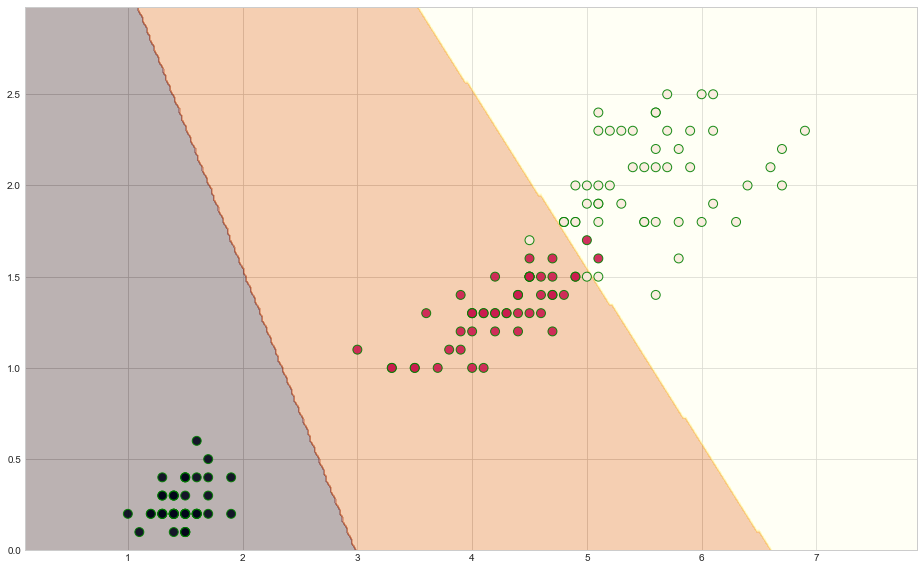

In [9]:
z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
z=z.reshape(xx.shape)
flg=plt.figure(figsize=(16,10))
ax=plt.contourf(xx,yy,z,cmap='afmhot',alpha=0.3);
plt.scatter(X.values[:,0],X.values[:,1],c=y,s=80,alpha=0.9,edgecolor='g')

## Linear SVM Implementation

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## Scale Features

In [11]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_std_train=sc_x.fit_transform(X_train)

In [12]:
C=1.0
clf=svm.SVC(kernel="linear", C=C)
clf.fit(X_std_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score

## Cross validation within Train Dataset

In [16]:
res=cross_val_score(clf,X_std_train,y_train,cv=10,scoring="accuracy")
print("Average accuracy is :\t\t {0:.4f}".format(np.mean(res)))
print("Average mean is :\t\t {0:.4f}".format(np.std(res)))

Average accuracy is :		 0.9501
Average mean is :		 0.0538


In [20]:
y_train_pred=cross_val_predict(clf,X_std_train,y_train,cv=3)

In [21]:
y_train_pred

array([2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 1, 2, 1, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0,
       1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2,
       0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1,
       0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 2, 0, 1, 2, 2, 0, 1,
       1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [22]:
confusion_matrix(y_train,y_train_pred)

array([[39,  0,  0],
       [ 0, 34,  3],
       [ 0,  3, 41]], dtype=int64)

In [25]:
print("Precision Score: \t\t {0:.4f}".format(precision_score(y_train,y_train_pred,average='weighted')))
print("Recall    Score: \t\t {0:.4f}".format(recall_score(y_train,y_train_pred,average='weighted')))
print("F1        Score: \t\t {0:.4f}".format(f1_score(y_train,y_train_pred,average='weighted')))

Precision Score: 		 0.9500
Recall    Score: 		 0.9500
F1        Score: 		 0.9500


## Cross Validation within Test Dataset

In [27]:
y_test_pred=cross_val_predict(clf,sc_x.transform(X_test),y_test,cv=3)

In [29]:
confusion_matrix(y_test,y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  2,  4]], dtype=int64)

In [30]:
print("Precision Score: \t\t {0:.4f}".format(precision_score(y_test,y_test_pred,average='weighted')))
print("Recall    Score: \t\t {0:.4f}".format(recall_score(y_test,y_test_pred,average='weighted')))
print("F1        Score: \t\t {0:.4f}".format(f1_score(y_test,y_test_pred,average='weighted')))

Precision Score: 		 0.9422
Recall    Score: 		 0.9333
F1        Score: 		 0.9290


<b>kernel="poly"</b>

In [31]:
C=1.0
clf=svm.SVC(kernel="poly", degree=3, C=C)
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [35]:
Xv=X.values.reshape(-1,1)
h=0.02
x_min,x_max=Xv.min(),Xv.max()+1
y_min,y_max=y.min(),y.max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),
                 np.arange(y_min,y_max,h))

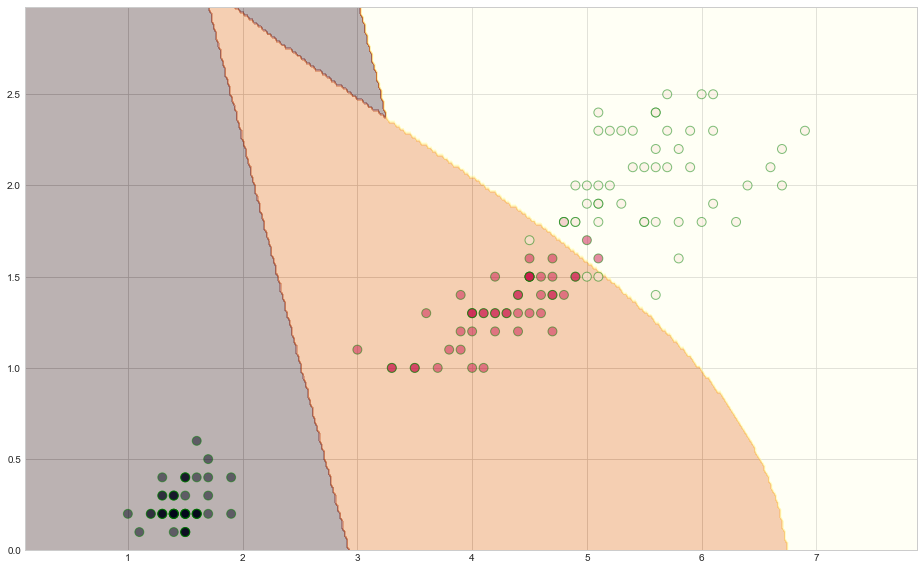

In [40]:
z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
z=z.reshape(xx.shape)
fig=plt.figure(figsize=(16,10))
ax=plt.contourf(xx,yy,z,cmap='afmhot',alpha=0.3)
plt.scatter(X.values[:,0],X.values[:,1], c=y, s=80,alpha=0.5,edgecolor='g')

## Polynomial SVM Implementation

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## Scale Features

In [54]:
sc_x=StandardScaler()
X_std_train=sc_x.fit_transform(X_train)

In [55]:
C=1.0
clf=svm.SVC(kernel="poly",degree=3,C=C)
clf.fit(X_std_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Cross Validation within Train Dataset

In [56]:
res=cross_val_score(clf,X_std_train,y_train,cv=10,scoring="accuracy")
print("Average accuracy is :\t\t {0:.4f}".format(np.mean(res)))
print("Average mean is :\t\t {0:.4f}".format(np.std(res)))

Average accuracy is :		 0.9524
Average mean is :		 0.0712


In [57]:
y_train_pred=cross_val_predict(clf,X_std_train,y_train,cv=3)

In [58]:
confusion_matrix(y_train,y_train_pred)

array([[39,  0,  0],
       [ 0, 37,  0],
       [ 0,  6, 38]], dtype=int64)

In [59]:
print("Precision Score: \t\t {0:.4f}".format(precision_score(y_train,y_train_pred,average='weighted')))
print("Recall    Score: \t\t {0:.4f}".format(recall_score(y_train,y_train_pred,average='weighted')))
print("F1        Score: \t\t {0:.4f}".format(f1_score(y_train,y_train_pred,average='weighted')))

Precision Score: 		 0.9570
Recall    Score: 		 0.9500
F1        Score: 		 0.9500


## Cross Validation within Test Dataset

In [60]:
y_test_pred=cross_val_predict(clf,sc_x.transform(X_test),y_test,cv=3)

In [61]:
confusion_matrix(y_test,y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  3,  3]], dtype=int64)

In [62]:
print("Precision Score: \t\t {0:.4f}".format(precision_score(y_test,y_test_pred,average='weighted')))
print("Recall    Score: \t\t {0:.4f}".format(recall_score(y_test,y_test_pred,average='weighted')))
print("F1        Score: \t\t {0:.4f}".format(f1_score(y_test,y_test_pred,average='weighted')))

Precision Score: 		 0.9187
Recall    Score: 		 0.9000
F1        Score: 		 0.8885


## Gaussian Radial Basis Function

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [64]:
sc_x=StandardScaler()
X_std_train=sc_x.fit_transform(X_train)

In [65]:
C=1.0
clf=svm.SVC(kernel="rbf", gamma=0.7, C=C)
clf.fit(X_std_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Cross Validation within Train Dataset

In [67]:
res=cross_val_score(clf,X_std_train,y_train,cv=10,scoring="accuracy")
print("Average accuracy is :\t\t {0:.4f}".format(np.mean(res)))
print("Average mean is :\t\t {0:.4f}".format(np.std(res)))

Average accuracy is :		 0.9501
Average mean is :		 0.0538


In [68]:
y_train_pred=cross_val_predict(clf,X_std_train,y_train,cv=3)

In [69]:
confusion_matrix(y_train,y_train_pred)

array([[39,  0,  0],
       [ 0, 35,  2],
       [ 0,  3, 41]], dtype=int64)

In [70]:
print("Precision Score: \t\t {0:.4f}".format(precision_score(y_train,y_train_pred,average='weighted')))
print("Recall    Score: \t\t {0:.4f}".format(recall_score(y_train,y_train_pred,average='weighted')))
print("F1        Score: \t\t {0:.4f}".format(f1_score(y_train,y_train_pred,average='weighted')))

Precision Score: 		 0.9586
Recall    Score: 		 0.9583
F1        Score: 		 0.9584


## Cross Validation within Test Dataset

In [71]:
y_test_pred=cross_val_predict(clf,sc_x.transform(X_test),y_test,cv=3)

In [72]:
confusion_matrix(y_test,y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  2,  4]], dtype=int64)

In [73]:
print("Precision Score: \t\t {0:.4f}".format(precision_score(y_test,y_test_pred,average='weighted')))
print("Recall    Score: \t\t {0:.4f}".format(recall_score(y_test,y_test_pred,average='weighted')))
print("F1        Score: \t\t {0:.4f}".format(f1_score(y_test,y_test_pred,average='weighted')))

Precision Score: 		 0.9422
Recall    Score: 		 0.9333
F1        Score: 		 0.9290


## Grid Search

In [74]:
from sklearn.pipeline import Pipeline

In [75]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [76]:
std=StandardScaler()
X_std_train=std.fit_transform(X_train)

In [106]:
#pipeline=Pipeline([('clf',svm.SVC(kernel='rbf',C=1,gamma=0.1))])

In [100]:
params=[{'C':[0.1,0.5,1,2,5,10,20],'gamma':[0.001,0.01,0.1,0.25,0.5,0.75,1]}]

In [108]:
svm_grid_rbf=GridSearchCV(svm.SVC(kernel='rbf'),params,n_jobs=-1,cv=3,verbose=1,scoring='accuracy')

In [109]:
svm_grid_rbf.fit(X_std_train,y_train)

Fitting 3 folds for each of 49 candidates, totalling 147 fits


[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:    8.5s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'C': [0.1, 0.5, 1, 2, 5, 10, 20], 'gamma': [0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [110]:
svm_grid_rbf.best_score_

0.9583333333333334

In [114]:
best=svm_grid_rbf.best_estimator_.get_params()
best

{'C': 0.1,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.5,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}